In [24]:
# install Libary
!pip install nb-black

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [25]:
# Import dependencies that will be used on N-gram
from IPython.core.debugger import set_trace

%reload_ext nb_black

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import time

plt.style.use(style="seaborn-v0_8")
%matplotlib inline

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [26]:
# load dataset
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [27]:
# print dataset
train.head().T

0  \
id                                                        1   
keyword                                                 NaN   
location                                                NaN   
text      Our Deeds are the Reason of this #earthquake M...   
target                                                    1   

                                               1  \
id                                             4   
keyword                                      NaN   
location                                     NaN   
text      Forest fire near La Ronge Sask. Canada   
target                                         1   

                                                          2  \
id                                                        5   
keyword                                                 NaN   
location                                                NaN   
text      All residents asked to 'shelter in place' are ...   
target                                                    1   

                                                          3  \
id                                                        6   
keyword                                                 NaN   
location                                                NaN   
text      13,000 people receive #wildfires evacuation or...   
target                                                    1   

                                                          4  
id                                                        7  
keyword                                                 NaN  
location                                                NaN  
text      Just got sent this photo from Ruby #Alaska as ...  
target                                                    1

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [28]:
# print dataset
test.head().T

0  \
id                                         0   
keyword                                  NaN   
location                                 NaN   
text      Just happened a terrible car crash   

                                                          1  \
id                                                        2   
keyword                                                 NaN   
location                                                NaN   
text      Heard about #earthquake is different cities, s...   

                                                          2  \
id                                                        3   
keyword                                                 NaN   
location                                                NaN   
text      there is a forest fire at spot pond, geese are...   

                                                 3  \
id                                               9   
keyword                                        NaN   
location                                       NaN   
text      Apocalypse lighting. #Spokane #wildfires   

                                                      4  
id                                                   11  
keyword                                             NaN  
location                                            NaN  
text      Typhoon Soudelor kills 28 in China and Taiwan

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [29]:
# import stopwords method
from nltk.corpus import stopwords

# List stopword in english
stopwords.words("english")

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [30]:
# function for processing
from nltk.corpus import stopwords


def generate_ngrams(text, n_gram=1, stop=True):
    """
    Simple n-gram generator.
    """
    stop = set(stopwords.words("english")) if stop else {}

    token = [
        token for token in text.lower().split(" ") if token != "" if token not in stop
    ]
    z = zip(*[token[i:] for i in range(n_gram)])
    ngrams = [" ".join(ngram) for ngram in z]
    return ngrams

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### UNIGRAM

In [31]:
# create unigram
from collections import defaultdict

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [32]:
# defaultdict process
disaster_unigrams = defaultdict(int)
nondisaster_unigrams = defaultdict(int)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [33]:
# Retrieve data from the dataset feature to display a list dictionary
for text in train[train.target == 1].text:
    for word in generate_ngrams(text):
        disaster_unigrams[word] += 1

for text in train[train.target == 0].text:
    for word in generate_ngrams(text):
        nondisaster_unigrams[word] += 1

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [34]:
# Displays a unigram dictioary list from disaster
disaster_unigrams

defaultdict(int,
            {'deeds': 1,
             'reason': 7,
             '#earthquake': 19,
             'may': 47,
             'allah': 4,
             'forgive': 1,
             'us': 40,
             'forest': 44,
             'fire': 150,
             'near': 47,
             'la': 17,
             'ronge': 1,
             'sask.': 1,
             'canada': 4,
             'residents': 7,
             'asked': 1,
             "'shelter": 1,
             "place'": 1,
             'notified': 1,
             'officers.': 1,
             'evacuation': 38,
             'shelter': 5,
             'place': 12,
             'orders': 9,
             'expected': 9,
             '13,000': 1,
             'people': 93,
             'receive': 2,
             '#wildfires': 5,
             'california': 88,
             'got': 29,
             'sent': 4,
             'photo': 7,
             'ruby': 1,
             '#alaska': 1,
             'smoke': 11,
             'pours': 1,
     

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [35]:
# Displays a list of disaster uniforms
disaster_unigrams.items()

dict_items([('deeds', 1), ('reason', 7), ('#earthquake', 19), ('may', 47), ('allah', 4), ('forgive', 1), ('us', 40), ('forest', 44), ('fire', 150), ('near', 47), ('la', 17), ('ronge', 1), ('sask.', 1), ('canada', 4), ('residents', 7), ('asked', 1), ("'shelter", 1), ("place'", 1), ('notified', 1), ('officers.', 1), ('evacuation', 38), ('shelter', 5), ('place', 12), ('orders', 9), ('expected', 9), ('13,000', 1), ('people', 93), ('receive', 2), ('#wildfires', 5), ('california', 88), ('got', 29), ('sent', 4), ('photo', 7), ('ruby', 1), ('#alaska', 1), ('smoke', 11), ('pours', 1), ('school', 29), ('#rockyfire', 4), ('update', 8), ('=>', 1), ('hwy.', 4), ('20', 9), ('closed', 15), ('directions', 1), ('due', 23), ('lake', 8), ('county', 26), ('-', 389), ('#cafire', 2), ('#flood', 4), ('#disaster', 6), ('heavy', 18), ('rain', 22), ('causes', 9), ('flash', 17), ('flooding', 31), ('streets', 2), ('manitou,', 1), ('colorado', 9), ('springs', 3), ('areas', 7), ("i'm", 41), ('top', 13), ('hill', 5)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [36]:
# Create a dataframe from the disaster dict list. And sort in ascending order

df_disaster_unigrams = pd.DataFrame(
    sorted(disaster_unigrams.items(), key=lambda x: x[1], reverse=True)
)
df_nondisaster_unigrams = pd.DataFrame(
    sorted(nondisaster_unigrams.items(), key=lambda x: x[1], reverse=True)
)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [53]:
# Displaying the data tuples that have been sorted here we display 10 data
sorted(disaster_unigrams.items(), key=lambda x: x[1], reverse=True)[:10]

[('-', 389),
 ('fire', 150),
 ('via', 117),
 ('&amp;', 105),
 ('...', 105),
 ('suicide', 103),
 ('disaster', 97),
 ('people', 93),
 ('police', 93),
 ('killed', 92)]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [38]:
# Displaying dataframe results in a table
df_disaster_unigrams.head()

0    1
0      -  389
1   fire  150
2    via  117
3  &amp;  105
4    ...  105

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

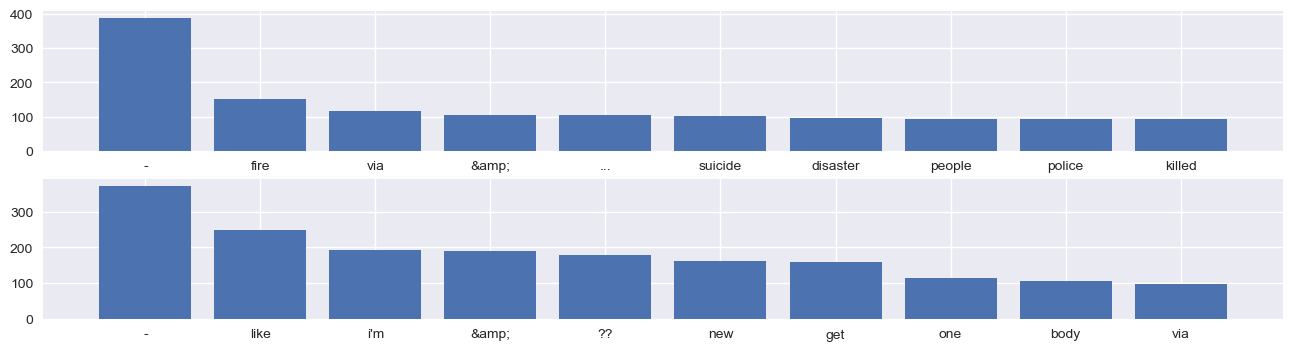

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [39]:
# Displays the display of the distribution of the Unigram result data on the bar
d1 = df_disaster_unigrams[0][:10]
d2 = df_disaster_unigrams[1][:10]

nd1 = df_nondisaster_unigrams[0][:10]
nd2 = df_nondisaster_unigrams[1][:10]

plt.figure(1, figsize=(16, 4))
plt.subplot(2, 1, 1)
_ = plt.bar(d1, d2)

plt.subplot(2, 1, 2)
_ = plt.bar(nd1, nd2)

### BIGRAM

In [40]:
# create bigram

disaster_bigrams = defaultdict(int)
nondisaster_bigrams = defaultdict(int)

for text in train[train.target == 1].text:
    for word in generate_ngrams(text, n_gram=2):
        disaster_bigrams[word] += 1

for text in train[train.target == 0].text:
    for word in generate_ngrams(text, n_gram=2):
        nondisaster_bigrams[word] += 1

df_disaster_bigrams = pd.DataFrame(
    sorted(disaster_bigrams.items(), key=lambda x: x[1])[::-1]
)
df_nondisaster_bigrams = pd.DataFrame(
    sorted(nondisaster_bigrams.items(), key=lambda x: x[1])[::-1]
)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\PRAKTIKAN-06\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 137 (\x89) missing from current font.
  func(*args, **kwargs)
C:\Users\PRAKTIKAN-06\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 137 (\x89) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


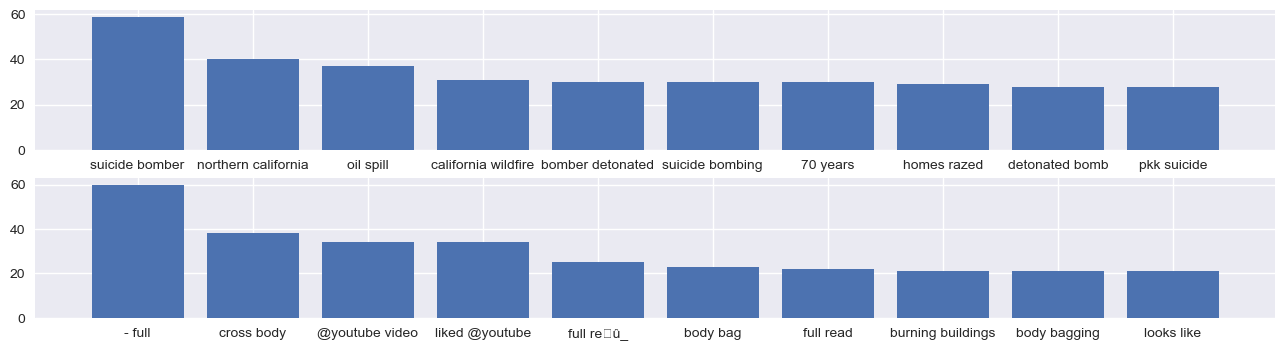

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [41]:
# Bigram disaster bar plot results based on frequency
d1 = df_disaster_bigrams[0][:10]
d2 = df_disaster_bigrams[1][:10]

nd1 = df_nondisaster_bigrams[0][:10]
nd2 = df_nondisaster_bigrams[1][:10]

plt.figure(1, figsize=(16, 4))
plt.subplot(2, 1, 1)
_ = plt.bar(d1, d2)

plt.subplot(2, 1, 2)
_ = plt.bar(nd1, nd2)

In [42]:
# check bigrams in its entirety on a corpus or dataset
from sklearn.feature_extraction.text import CountVectorizer


def get_top_text_ngrams(corpus, ngrams=(1, 1), nr=None):
    """
    Creates a bag of ngrams and counts ngram frequency.
    Returns a sorted list of tuples: (ngram, count)
    """
    vec = CountVectorizer(ngram_range=ngrams).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:nr]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [43]:
# Showing top 10 biagrams in corpus
top_text_bigrams = get_top_text_ngrams(train.text, ngrams=(2, 2), nr=10)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [45]:
# List Tip text biagram
top_text_bigrams

[('http co', 4306),
 ('https co', 410),
 ('in the', 308),
 ('of the', 256),
 ('û_ http', 217),
 ('on the', 129),
 ('to the', 126),
 ('to be', 108),
 ('for the', 97),
 ('at the', 85)]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<BarContainer object of 10 artists>

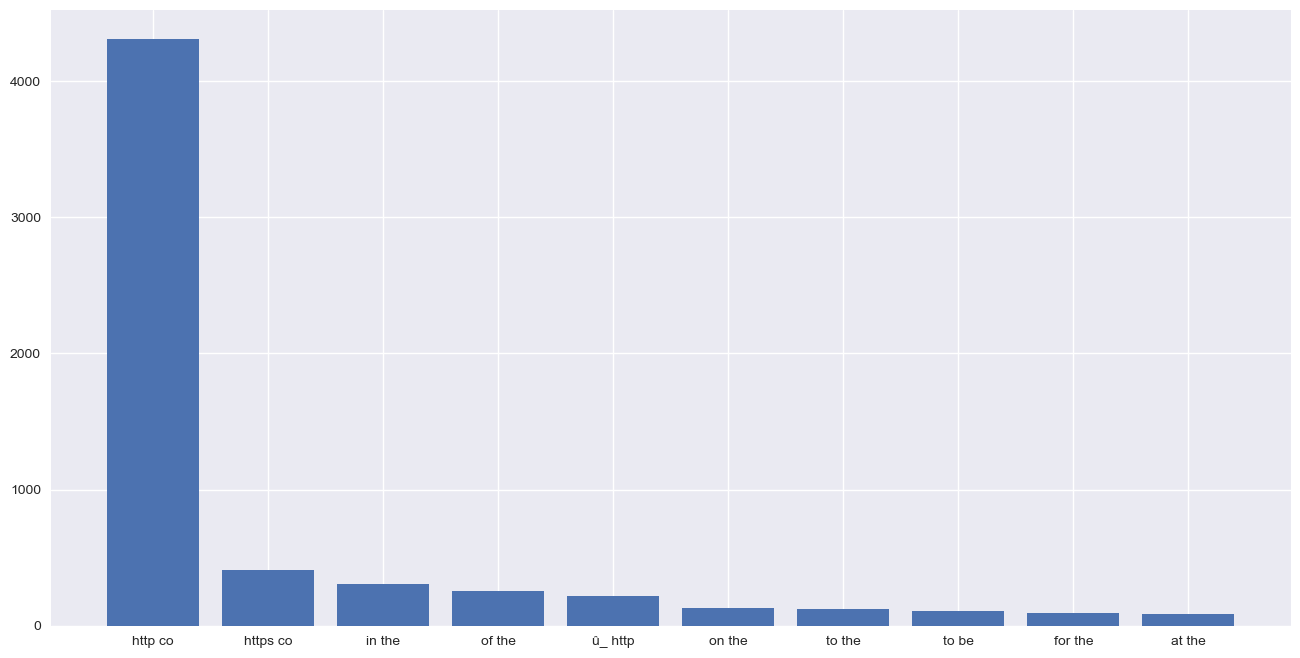

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [47]:
# Distribution process on bar plots
x, y = zip(*top_text_bigrams)
plt.figure(1, figsize=(16, 8))
plt.subplot(1, 1, 1)
plt.bar(x, y)

### N-GRAM SENTENCE AND WORD

In [48]:
# import library yang dibutuhkan
from nltk import ngrams
from nltk.util import ngrams
import nltk

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [49]:
sentence = "Buku di perpustakaan sekolah banyak yang rusak"
# print (sentence. split())
n = 4  # fourgram
fourgram = ngrams(sentence.split(), n)  # memanggiL fungsi ngrams, dari nltk
# ngrams ini punya dua paramaeter, pertama sentence yang dipecah berarti tipe data array
# kedua ngramsnya disini menggunakan fourgram
for grams in fourgram:
    print(grams)

('Buku', 'di', 'perpustakaan', 'sekolah')
('di', 'perpustakaan', 'sekolah', 'banyak')
('perpustakaan', 'sekolah', 'banyak', 'yang')
('sekolah', 'banyak', 'yang', 'rusak')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [50]:
# Bigram process with word_tokenize() function tokenization:

text = "Buku di perpustakaan sekolah banyak yang rusak"
tokenize = nltk.word_tokenize(text)
# print(tokenize)
n = 2
bigrams = ngrams(text.split(), n)
for grams in bigrams:
    print(grams)

('Buku', 'di')
('di', 'perpustakaan')
('perpustakaan', 'sekolah')
('sekolah', 'banyak')
('banyak', 'yang')
('yang', 'rusak')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [51]:
n = 5
sentence = "fasilitas di kamar mandi banyak yang rusak"
text_ngrams = ngrams(sentence, n)
for text in text_ngrams:
    print(text)

('f', 'a', 's', 'i', 'l')
('a', 's', 'i', 'l', 'i')
('s', 'i', 'l', 'i', 't')
('i', 'l', 'i', 't', 'a')
('l', 'i', 't', 'a', 's')
('i', 't', 'a', 's', ' ')
('t', 'a', 's', ' ', 'd')
('a', 's', ' ', 'd', 'i')
('s', ' ', 'd', 'i', ' ')
(' ', 'd', 'i', ' ', 'k')
('d', 'i', ' ', 'k', 'a')
('i', ' ', 'k', 'a', 'm')
(' ', 'k', 'a', 'm', 'a')
('k', 'a', 'm', 'a', 'r')
('a', 'm', 'a', 'r', ' ')
('m', 'a', 'r', ' ', 'm')
('a', 'r', ' ', 'm', 'a')
('r', ' ', 'm', 'a', 'n')
(' ', 'm', 'a', 'n', 'd')
('m', 'a', 'n', 'd', 'i')
('a', 'n', 'd', 'i', ' ')
('n', 'd', 'i', ' ', 'b')
('d', 'i', ' ', 'b', 'a')
('i', ' ', 'b', 'a', 'n')
(' ', 'b', 'a', 'n', 'y')
('b', 'a', 'n', 'y', 'a')
('a', 'n', 'y', 'a', 'k')
('n', 'y', 'a', 'k', ' ')
('y', 'a', 'k', ' ', 'y')
('a', 'k', ' ', 'y', 'a')
('k', ' ', 'y', 'a', 'n')
(' ', 'y', 'a', 'n', 'g')
('y', 'a', 'n', 'g', ' ')
('a', 'n', 'g', ' ', 'r')
('n', 'g', ' ', 'r', 'u')
('g', ' ', 'r', 'u', 's')
(' ', 'r', 'u', 's', 'a')
('r', 'u', 's', 'a', 'k')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [52]:
sentence = "fasilitas di kamar mandi banyak yang rusak"
n = 5
[sentence[i : i + n] for i in range(len(sentence) - n + 1)]

['fasil',
 'asili',
 'silit',
 'ilita',
 'litas',
 'itas ',
 'tas d',
 'as di',
 's di ',
 ' di k',
 'di ka',
 'i kam',
 ' kama',
 'kamar',
 'amar ',
 'mar m',
 'ar ma',
 'r man',
 ' mand',
 'mandi',
 'andi ',
 'ndi b',
 'di ba',
 'i ban',
 ' bany',
 'banya',
 'anyak',
 'nyak ',
 'yak y',
 'ak ya',
 'k yan',
 ' yang',
 'yang ',
 'ang r',
 'ng ru',
 'g rus',
 ' rusa',
 'rusak']

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>